## **Import libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Activation, Input, Flatten, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## **Download the dataset**

Download and extract the dataset from the below link in a folder.

https://drive.google.com/file/d/1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P/view?usp=sharing

In [ ]:
!mkdir tumor

In [ ]:
# download brain_tumor data
!gdown --id 1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P
!mv dataset.zip tumor/

Downloading...
From: https://drive.google.com/uc?id=1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P
To: /content/dataset.zip
100% 65.7M/65.7M [00:01<00:00, 33.8MB/s]


In [ ]:
!unzip tumor/dataset.zip -d tumor/

Archive:  tumor/dataset.zip
   creating: tumor/no/
  inflating: tumor/no/no0.jpg        
  inflating: tumor/no/no1.jpg        
  inflating: tumor/no/no10.jpg       
  inflating: tumor/no/no100.jpg      
  inflating: tumor/no/no1000.jpg     
  inflating: tumor/no/no1001.jpg     
  inflating: tumor/no/no1002.jpg     
  inflating: tumor/no/no1003.jpg     
  inflating: tumor/no/no1004.jpg     
  inflating: tumor/no/no1005.jpg     
  inflating: tumor/no/no1006.jpg     
  inflating: tumor/no/no1007.jpg     
  inflating: tumor/no/no1008.jpg     
  inflating: tumor/no/no1009.jpg     
  inflating: tumor/no/no101.jpg      
  inflating: tumor/no/no1010.jpg     
  inflating: tumor/no/no1011.jpg     
  inflating: tumor/no/no1012.jpg     
  inflating: tumor/no/no1013.jpg     
  inflating: tumor/no/no1014.jpg     
  inflating: tumor/no/no1015.jpg     
  inflating: tumor/no/no1016.jpg     
  inflating: tumor/no/no1017.jpg     
  inflating: tumor/no/no1018.jpg     
  inflating: tumor/no/no1019.jpg     

In [ ]:
!rm tumor/dataset.zip

## **Read image files from directory**

To be familiar with keras dataset loading and preprocessing you can use the below link:

https://keras.io/api/preprocessing/image/

Please set ***validation_split = 0.2***

In [ ]:
epochs = 30
train_batch_size = 32
val_batch_size = 8

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "tumor",
    label_mode="binary",
    color_mode="grayscale",
    batch_size=train_batch_size,
    image_size=(128, 128),
    seed=1337,
    validation_split=0.2,
    subset="training")

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "tumor",
    label_mode="binary",
    color_mode="grayscale",
    batch_size=val_batch_size,
    image_size=(128, 128),
    seed=1337,
    validation_split=0.2,
    subset="validation")

Found 3000 files belonging to 2 classes.
Using 2400 files for training.
Found 3000 files belonging to 2 classes.
Using 600 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['no', 'yes']


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  input_shape = image_batch[0].shape
  break

(32, 128, 128, 1)
(32, 1)


In [ ]:
input_shape

TensorShape([128, 128, 1])

## **Display the dataset**

Plot some samples from the dataset to see and know what are you working with. 

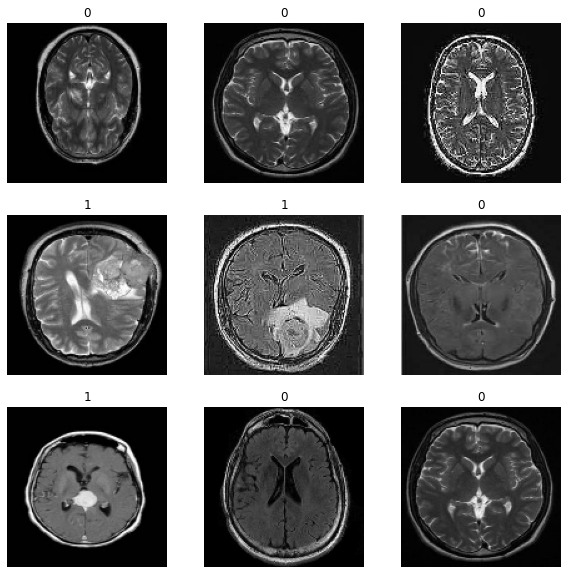

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i, :, :, 0].numpy().astype("uint8"), cmap="gray")
    plt.title(int(labels[i]))
    plt.axis("off")

## **Build the models**

In this section you will build the model with two approaches. 
First you should build it with the Sequential API and then you have to work with the Functional API in the second part. 

You can use the below link to know more about these two APIs.

Keep the architecture as simple as possible.

https://medium.com/analytics-vidhya/keras-model-sequential-api-vs-functional-api-fc1439a6fb10

## 1.**Sequential API**

### **Build a sequiential model**

In [ ]:
model = Sequential()
model.add(Input(shape=input_shape))
model.add(Rescaling(1.0 / 255))
model.add(Conv2D(filters=8,kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(filters=16,kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 1)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 126, 126, 8)       80        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 16)        1168      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)       

In [ ]:
es_callback = EarlyStopping(monitor='val_acc', min_delta=0, patience=5)

### **Train the model**

In [ ]:
history = model.fit(train_ds,
          epochs=epochs,
          callbacks=[es_callback],
          validation_data=val_ds)

Epoch 1/30
75/75 [==============================] - 4s 43ms/step - loss: 0.4945 - acc: 0.7675 - val_loss: 0.3840 - val_acc: 0.8167
Epoch 2/30
75/75 [==============================] - 3s 42ms/step - loss: 0.3372 - acc: 0.8562 - val_loss: 0.2901 - val_acc: 0.8783
Epoch 3/30
75/75 [==============================] - 3s 42ms/step - loss: 0.2183 - acc: 0.9162 - val_loss: 0.1986 - val_acc: 0.9200
Epoch 4/30
75/75 [==============================] - 3s 42ms/step - loss: 0.1520 - acc: 0.9475 - val_loss: 0.1359 - val_acc: 0.9583
Epoch 5/30
75/75 [==============================] - 3s 41ms/step - loss: 0.0921 - acc: 0.9733 - val_loss: 0.1551 - val_acc: 0.9467
Epoch 6/30
75/75 [==============================] - 3s 41ms/step - loss: 0.0720 - acc: 0.9792 - val_loss: 0.0762 - val_acc: 0.9767
Epoch 7/30
75/75 [==============================] - 4s 48ms/step - loss: 0.0402 - acc: 0.9896 - val_loss: 0.0828 - val_acc: 0.9750
Epoch 8/30
75/75 [==============================] - 3s 41ms/step - loss: 0.0251 - a

### **Test the model**

In [ ]:
# Score trained model.
scores = model.evaluate(val_ds, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

75/75 [==============================] - 8s 110ms/step - loss: 0.0723 - acc: 0.9833
Test loss: 0.0723339319229126
Test accuracy: 0.9833333492279053


### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

In [ ]:
def plot_history(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

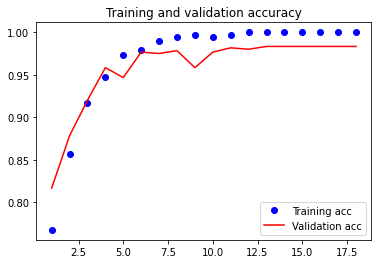

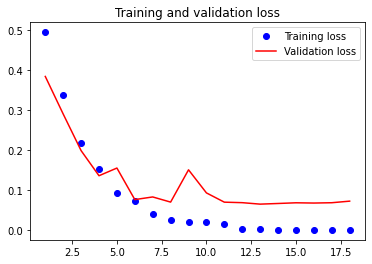

In [ ]:
plot_history(history)

## 2.**Functional API**

### **Build a model**

In [ ]:
input = Input(shape=input_shape)
rescale = Rescaling(1.0 / 255) (input)
conv1 = Conv2D(filters=8,kernel_size=(3,3), activation="relu")(rescale)
pool1 = MaxPool2D()(conv1)
conv2 = Conv2D(filters=16,kernel_size=(3,3), activation="relu")(pool1)
pool2 = MaxPool2D()(conv2)
conv3 = Conv2D(filters=32, kernel_size=(3,3), activation="relu")(pool2)
pool3 = MaxPool2D()(conv3)
flat = Flatten()(pool3)
hidden1 = Dense(units=128,activation="relu")(flat)
output = Dense(units=1, activation="sigmoid")(hidden1)

model = Model(inputs=input, outputs=output)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['acc'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 rescaling_4 (Rescaling)     (None, 128, 128, 1)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 126, 126, 8)       80        
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 63, 63, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 61, 61, 16)        1168      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 30, 30, 16)       0         
 g2D)                                                        

In [ ]:
es_callback = EarlyStopping(monitor='val_acc', min_delta=0, patience=5)

### **Train the model**

In [ ]:
history = model.fit(train_ds,
          epochs=epochs,
          callbacks=[es_callback],
          validation_data=val_ds)

Epoch 1/30
75/75 [==============================] - 4s 43ms/step - loss: 0.4813 - acc: 0.7750 - val_loss: 0.3588 - val_acc: 0.8367
Epoch 2/30
75/75 [==============================] - 3s 42ms/step - loss: 0.2980 - acc: 0.8700 - val_loss: 0.2974 - val_acc: 0.8633
Epoch 3/30
75/75 [==============================] - 3s 41ms/step - loss: 0.1942 - acc: 0.9287 - val_loss: 0.1428 - val_acc: 0.9617
Epoch 4/30
75/75 [==============================] - 3s 42ms/step - loss: 0.1325 - acc: 0.9558 - val_loss: 0.1169 - val_acc: 0.9583
Epoch 5/30
75/75 [==============================] - 3s 41ms/step - loss: 0.0911 - acc: 0.9688 - val_loss: 0.0965 - val_acc: 0.9683
Epoch 6/30
75/75 [==============================] - 3s 41ms/step - loss: 0.0705 - acc: 0.9817 - val_loss: 0.0807 - val_acc: 0.9783
Epoch 7/30
75/75 [==============================] - 3s 41ms/step - loss: 0.0490 - acc: 0.9896 - val_loss: 0.2411 - val_acc: 0.8883
Epoch 8/30
75/75 [==============================] - 3s 41ms/step - loss: 0.0433 - a

### **Test the model**

In [ ]:
# Score trained model.
scores = model.evaluate(val_ds, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

75/75 [==============================] - 1s 9ms/step - loss: 0.0737 - acc: 0.9750
Test loss: 0.07372693717479706
Test accuracy: 0.9750000238418579


### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

In [ ]:
def plot_history(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

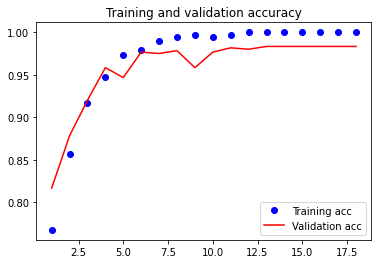

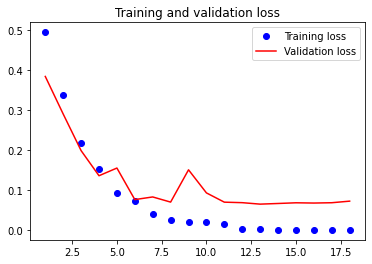

In [ ]:
plot_history(history)